## Overview

This  Project serves as a proof-of-concept for a new approach to creating ML solutions that enables anybody, anywhere to take advantage of the opportunities that ML may offer. The project aims to increase/improve the accessibility, reproducibility, contextualization and enhancement of Artificial Intelligence solutions globally and particularly in addressing public health challenges.

## Problem Definition

The Diabetes mellitus disease is fast rising to epidemic levels all over the world according to WHO reports that diabetes resulted in 1.5 million deaths in 2012, making it the 8th leading cause of death. The number of people with diabetes rose from 108 million in 1980 to 422 million in 2014. Prevalence has been rising more rapidly in low- and middle-income countries than in high-income countries.

Group of people affected mostly are adults(65 and older). Statistics shows that more women are affected than men.


### Solution

The solution is a diabetes detection model. It helps health practitioners in hospitals, clinics and laboratories to quickly detect whether a patient has diabetes.
The outcome of the solution is a prediction of whether the patient has diabetes or not given.
The key stakeholders are the health practitioners and patients.
Diabetes can be controlled if it is predicted earlier. Machine learning will provide better prediction.


## Dataset

The dataset is made up important clinical and laboratory measurements along with demographic information. The dataset used in this project was taken from kaggle.
 The dataset contains 2000 samples, 9 attributes Pregnacies, Glucose, Blood pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age, Outcome were considered, out of which 8 are independent variables and one is a dependent variable.


### Data Preprocessing/EDA

Data Preprocessing is the most important step in the proposed model, It helps to remove irrelevant data, errors, duplicates  and transform real world data into understandable format.
Data cleaning is used as the Preprocesing method.
The data is divided into training and testing set. The training set ensures that models learn from the training data and test its performance with the testing data.
The training data contains 80% of total dataset and testing data contains 20% of dataset.


In [1]:
# for data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# silence any future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#get a technical summary
diabetes_df = pd.read_csv("diabetes-dataset.csv")
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [5]:
# summary descriptive statistics for numeric
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [6]:
#get the shape
diabetes_df.shape

(2000, 9)

In [7]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#check for missing values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking for outliers

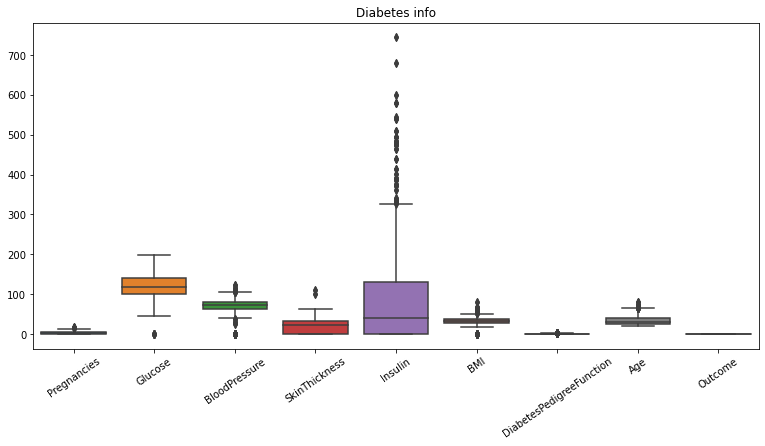

In [9]:
plt.figure(figsize=(13,6))
ax = sns.boxplot(data = diabetes_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.title("Diabetes info")
plt.show()

In [10]:
df_without_outlier = diabetes_df[(diabetes_df["Pregnancies"] <=13) & (diabetes_df["Glucose"] > 0)
                                 & (diabetes_df["SkinThickness"] <=70) & (diabetes_df["Insulin"] <=300)
                                & (diabetes_df["DiabetesPedigreeFunction"] <=1.4) 
                                 & (diabetes_df["Age"] <=60)]
df_without_outlier.shape

(1778, 9)

In [11]:
df_without_outlier_ = df_without_outlier[(df_without_outlier["BloodPressure"] >= 38) 
                                        & (df_without_outlier["BloodPressure"] <= 103)]
df_without_outlier_.shape

(1659, 9)

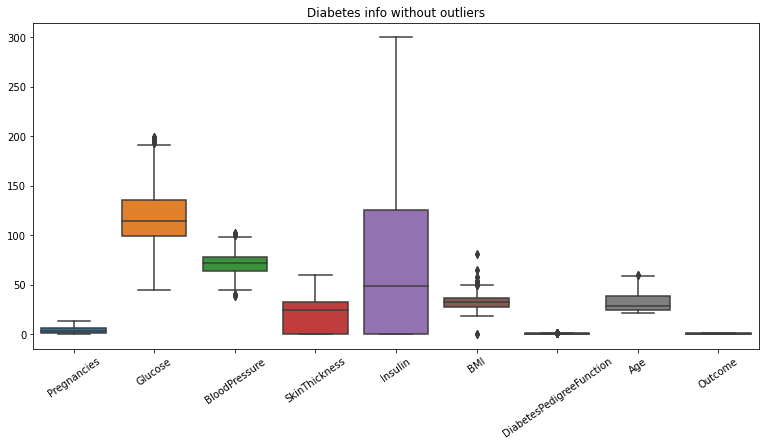

In [12]:
plt.figure(figsize=(13,6))
ax = sns.boxplot(data =df_without_outlier_)
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.title("Diabetes info without outliers")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_without_outlier_, test_size=0.20, random_state=42)

In [14]:
train_df["Outcome"].value_counts()

0    900
1    427
Name: Outcome, dtype: int64

In [15]:
# get all the duplicated rows
train_dups = train_df[train_df.duplicated(subset=None, keep='first')]
# get the index of all the healthy duplicates
healthy_dups = train_dups.loc[train_df["Outcome"] == 0].index
# drop the healthy duplicates
train_df = train_df.drop(healthy_dups)

In [16]:
train_df["Outcome"].value_counts()

1    427
0    411
Name: Outcome, dtype: int64

In [38]:
# separate the data from the labels
X_train, y_train = train_df.drop(columns=["Outcome"], axis=1), train_df["Outcome"]
X_test, y_test = test_df.drop(columns=["Outcome"], axis=1), test_df["Outcome"]

# create the scaler
scaler = RobustScaler()
# fit the scaler and transform our data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Distribution of each variable

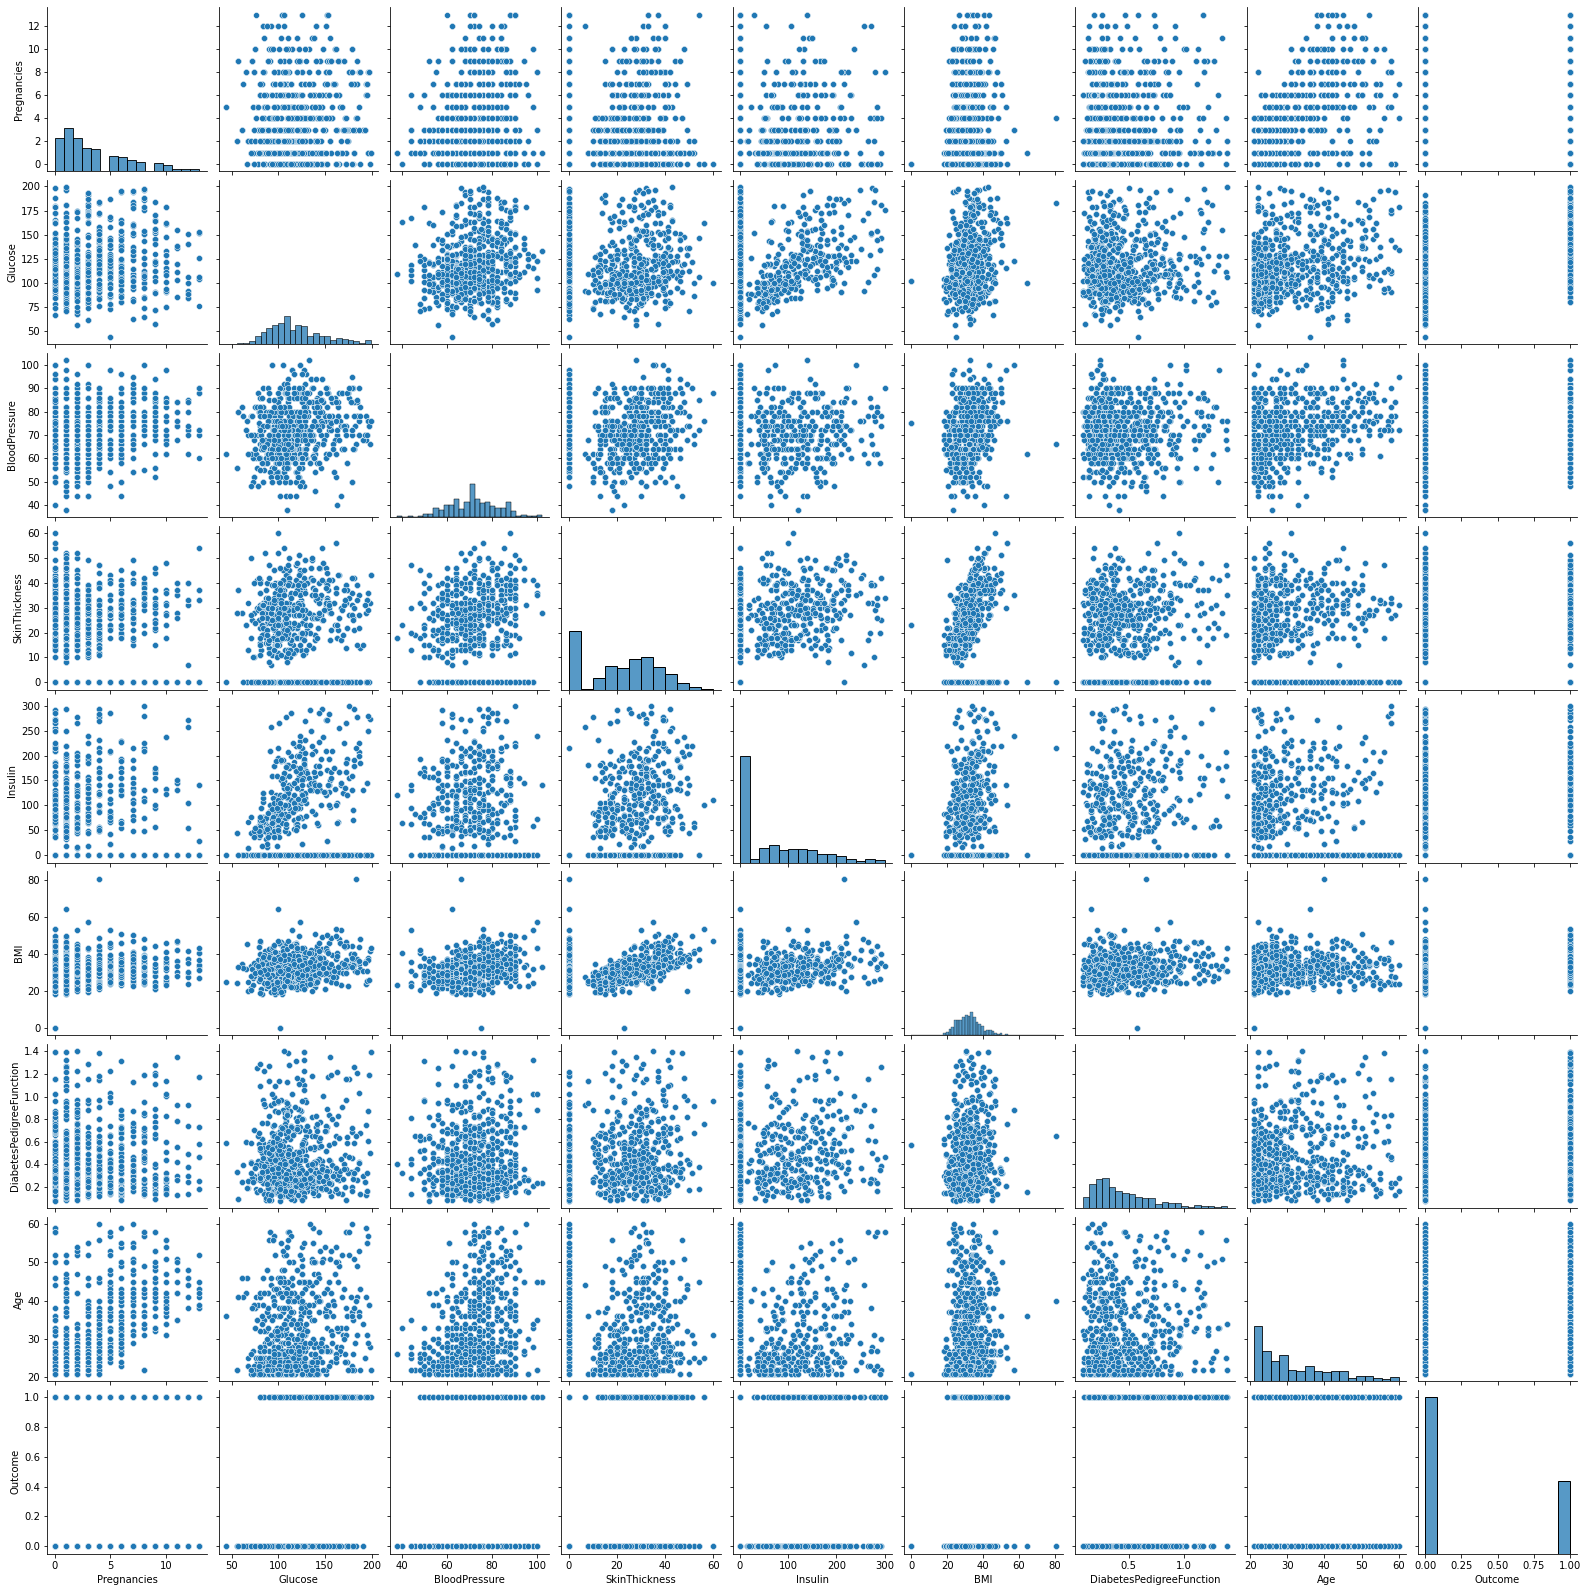

In [39]:
sns.pairplot(df_without_outlier_)
plt.show() 

### Correlation between variables

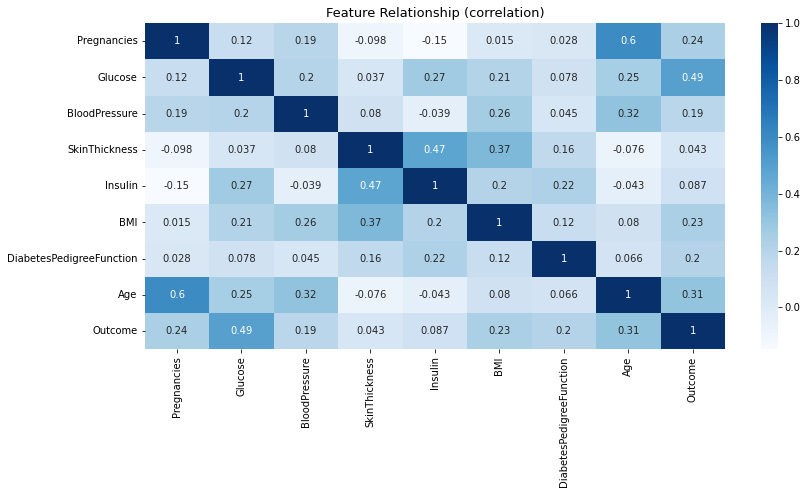

In [40]:
plt.figure(figsize=(13,6))
sns.heatmap(df_without_outlier_.corr(),
            annot=True,
            cmap="Blues")
plt.title("Feature Relationship (correlation)", size=13)
plt.show()

### Modelling

The model was built using Sklearn, a machine learning library in python for ML/AI applications.  
To carry out modelling five Machine Learning (ML) models were used including; Random Forest Classifier (RF), Decision Tree Classifier (DT), SVC, KNeighbors Classifier (KNN) and Logistic Regression (LR).
For the training, 80% of the dataset was used while 20% was used for testing. Recall, f1_score, precision and accuracy were the evaluation metrics used . Confusion matrix was used to know how right the algorithm was in predicting the wrong classes. 


In [41]:
from sklearn.model_selection import train_test_split
# Select the features
X = df_without_outlier_.drop("Outcome", axis = 1)

# select the label/target
y = df_without_outlier_["Outcome"]

#divide the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20,
                                                    random_state=42)
print(X.shape)
print(y.shape)

(1659, 8)
(1659,)


In [42]:
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Pos','False Neg', 'False Pos','True Neg']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Oranges_r',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Logistic Regression

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       231
           1       0.65      0.50      0.57       101

    accuracy                           0.77       332
   macro avg       0.72      0.69      0.70       332
weighted avg       0.75      0.77      0.76       332



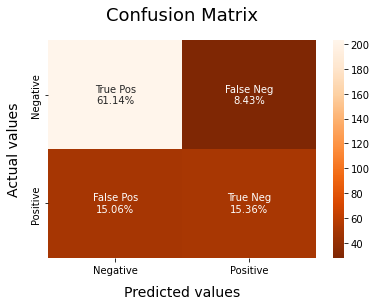

In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
acc_lr= model_Evaluate(lr)

### Linear Support Vector Machine

################## TRAINING IN PROGRESS FOR SVM #######################
################## TRAINING DONE ########################
Training set score with SVM: 0.793
Test set score with SVM : 0.783
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       231
           1       0.68      0.54      0.60       101

    accuracy                           0.78       332
   macro avg       0.75      0.72      0.73       332
weighted avg       0.77      0.78      0.78       332



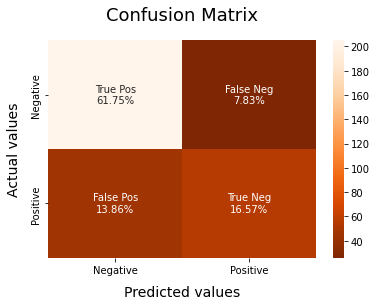

In [45]:
from sklearn.svm import LinearSVC


svm_model = LinearSVC(dual=False)

print("################## TRAINING IN PROGRESS FOR SVM #######################")
svm_model.fit(X_train, y_train)

print("################## TRAINING DONE ########################")
# make prediction and print accuracy
prediction = svm_model.predict(X_test)


# print(accuracy_score(y_test, prediction))
# print(classification_report(y_test, prediction))


print(f"Training set score with SVM: {accuracy_score(y_train, svm_model.predict(X_train)):.3f}")
print(f"Test set score with SVM : {accuracy_score(y_test, svm_model.predict(X_test)):.3f}") # Compute and plot the Confusion matrix
acc_svm_model= model_Evaluate(svm_model)

### Random Forest

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       231
           1       0.99      0.98      0.99       101

    accuracy                           0.99       332
   macro avg       0.99      0.99      0.99       332
weighted avg       0.99      0.99      0.99       332



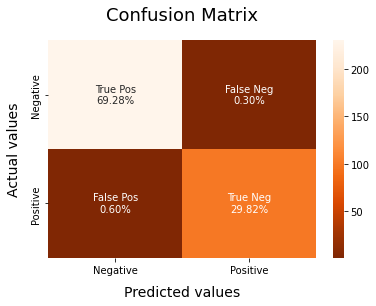

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
acc_rf= model_Evaluate(rf)

### KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       231
           1       0.67      0.65      0.66       101

    accuracy                           0.80       332
   macro avg       0.76      0.76      0.76       332
weighted avg       0.80      0.80      0.80       332



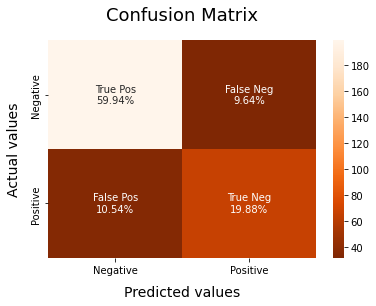

In [47]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
acc_kn= model_Evaluate(kn)

### DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       231
           1       0.94      0.93      0.94       101

    accuracy                           0.96       332
   macro avg       0.95      0.95      0.95       332
weighted avg       0.96      0.96      0.96       332



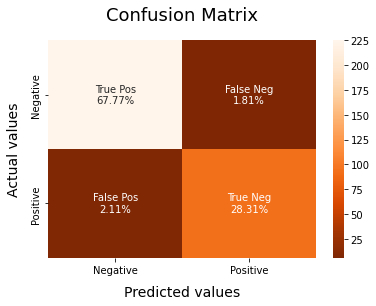

In [48]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
acc_dc= model_Evaluate(dc)

### Result

The RandomForest  model was able to predict 99% of the test data correctly and 1% wrongly. The model accuracy, precision, recall, f1_score are 99%, 99%, 99% and 99% respectively.
The RandomForest model obtained the best accuracy score of 99% followed by DecisionTree, KNN,SVM & LR models with an accuracy score of 97%, 89%, 78% & 81% respectively.
The measure of statistics utilized is the classification report available in scikit-learn (python library) which showed the precision, recall , accuracy and f1_score of the model


In [28]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 5, scoring='accuracy')

clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 12, 'max_features': 2}
0.9423153766464406


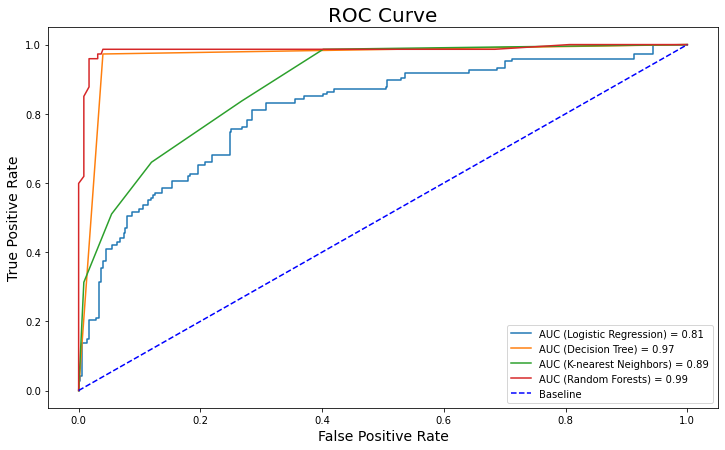

In [29]:
model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_kn = KNeighborsClassifier().fit(X_train, y_train)
probs_kn = model_kn.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_test.replace({'Good': 1, 'Bad': 0})
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_dt = roc_auc_score(y_test_int, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_int, probs_dt)

auc_kn = roc_auc_score(y_test_int, probs_kn)
fpr_kn, tpr_kn, thresholds_kn = roc_curve(y_test_int, probs_kn)

auc_rf = roc_auc_score(y_test_int, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, probs_rf)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_kn, tpr_kn, label=f'AUC (K-nearest Neighbors) = {auc_kn:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

### Conclusion

Using the Random Forest Classifiers, health practitioners will have a system that detect diabetes early and also diagnose the patients correctly as diabetes can be controlled if predicted early.
It can assist specialist to determine the appropriate treatment and reduce other clinical complications.
